# Gap junction coupling

Here we investigating the coupling coefficient between striatal fast spiking interneurons connected by gap junctions. A network of 100 FS neurons is created, and current is injected into a subset of them. The coupling to neighbouring neurons is calculated and shown.



Example current injection and corresponding voltage deflection in gap junction coupled striatal fast spiking interneuron (Koos, Tepper 1999). Here a 50ms current injection is done, and the ratio of the voltage deflection in the neighbouring neuron to the injected neuron is calculated. Out of seven pairs recorded, coupling factors of 3%, 7% and 20% were found (Koos, Tepper 2004).
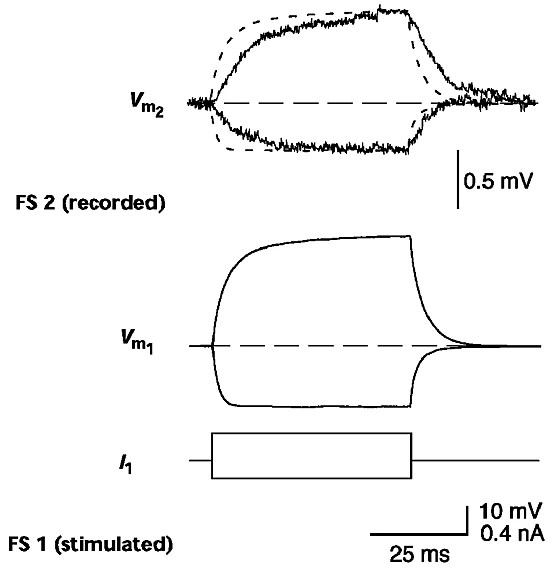

In [1]:
import os
os.environ["SNUDDA_DATA"] = "../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example. You can run this example without it, but then do not execute this cell."

In [2]:
network_path = "FS_gap_junction_coupling_simulation"
experiment_config_file = "FS_gap_junction_experiment-0.json"

In [3]:
# 80500 neurons per mm3, 1.3% are FS.
n_FS = 100
d_cube = (n_FS/(80500 * 0.013))**(1/3) * 1e-3

from snudda.place import create_cube_mesh
mesh_file = os.path.join(network_path, "mesh", "volume.obj")
create_cube_mesh(mesh_file, [0,0,0], d_cube, "FS network volume")

In [4]:
from snudda.init import SnuddaInit
si = SnuddaInit(network_path=network_path, random_seed=123)

si.define_structure(struct_name="StriatalVolume", struct_mesh=mesh_file, d_min=15e-6, mesh_bin_width=50e-6)

si.add_neurons(name="FS", num_neurons=n_FS, volume_id="StriatalVolume",
               neuron_dir=os.path.join("$SNUDDA_DATA","neurons","striatum","fs"))

cluster_FS_synapses = True
cluster_FS_gap_junctions = False
FS_gGABA = [1.1e-9, 1.5e-9]
FS_gGapJunction = [0.5e-9, 0.1e-9]

if False:
    # For this example we just want gap junctions, just listing GABA here for completness
    si.add_neuron_target(neuron_name="FS",
                         target_name="FS",
                         connection_type="GABA",
                         dist_pruning=None,
                         f1=0.15, soft_max=5, mu2=2, a3=1,
                         conductance=FS_gGABA,
                         cluster_synapses=cluster_FS_synapses,
                         mod_file="tmGabaA",
                         channel_param_dictionary={"tau1": (1.33e-3, 1e3),
                                                   "tau2": (5.7e-3, 1e3)})
    
si.add_neuron_target(neuron_name="FS",
                     target_name="FS",
                     connection_type="gap_junction",
                     dist_pruning=None,
                     f1=0.7, soft_max=8, mu2=2, a3=1.0,
                     conductance=FS_gGapJunction,
                     cluster_synapses=cluster_FS_gap_junctions,
                     channel_param_dictionary=None)

si.write_json()

Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Writing FS_gap_junction_coupling_simulation/network-config.json


In [5]:
from snudda import Snudda
snd = Snudda(network_path=network_path)
snd.create_network()

Placing neurons
Network path: FS_gap_junction_coupling_simulation
Reading SNUDDA_DATA=None from FS_gap_junction_coupling_simulation/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from FS_gap_junction_coupling_simulation/network-synapses.hdf5
Generating 34261 points for FS_gap_junction_coupling_simulation/mesh/volume.obj
n_points = 32580, previous close_pairs = 69449
n_points = 30986, previous close_pairs = 57207
n_points = 29475, previous close_pairs = 47688
n_points = 28046, previous close_pairs = 39940
n_points = 26696, previous close_pairs = 33373
n_points = 25426, previous close_pairs = 28156
n_points = 24237, previous close_pairs = 23493
n_points = 23129, previous close_pairs = 19880
n_points = 22100, previous close_pairs = 16747
n_points = 21153, previous close_pairs = 13875
n_points = 20289, previous close_pairs = 11653
n_points = 19504, previous close_pairs = 10010
n_points = 18794, previous close_pairs = 8517
n_points = 18160, previous close_pairs =

Using snudda_load we can find out which neurons are in the centre of our structure, to avoid edge effects. Here the option ```--centre 5``` lists the five neurons closest to the centre. These (26, 38, 24, 44) were then picked to receive current injectiosn, see [FS_gap_junction_experiment-0.json](FS_gap_junction_experiment-0.json)

In [6]:
!snudda_load FS_gap_junction_coupling_simulation/network-synapses.hdf5 --centre 5

Loading FS_gap_junction_coupling_simulation/network-synapses.hdf5
Loading config data from HDF5
Loading 100 neurons with 0 synapses and 568 gap junctions
Load done. 0.0
39 FS_3: (33.1, 70.5, 14.7) μm, distance to centre 66.2 μm
48 FS_2: (6.8, 74.1, 57.8) μm, distance to centre 71.6 μm
33 FS_0: (-41.6, -17.0, 85.4) μm, distance to centre 90.7 μm
21 FS_0: (53.1, -2.7, -46.1) μm, distance to centre 92.9 μm
26 FS_1: (-81.3, 44.5, -53.8) μm, distance to centre 93.4 μm


Using ```--listGJ``` we can see that neuron 26 connects to three other neurons using gap junctions. To see all options for ```snudda_load``` type ```--help```.

In [7]:
!snudda_load FS_gap_junction_coupling_simulation/network-synapses.hdf5 --listGJ 26


Loading FS_gap_junction_coupling_simulation/network-synapses.hdf5
Loading config data from HDF5
Loading 100 neurons with 0 synapses and 568 gap junctions
Load done. 0.0
List gap junctions of neuron_id = 26 (FS_1)
Finding gap junctions connecting neuron 26
10 : FS_1 (2 gap junctions)
11 : FS_2 (2 gap junctions)
54 : FS_3 (2 gap junctions)


In [8]:
!nrnivmodl $SNUDDA_DATA/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks/FS-network
Mod files: "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/bk_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/bk_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/bk_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/ca_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/cal12_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/da

In [9]:
from snudda.simulate.pair_recording import PairRecording

pr = PairRecording(network_path=network_path, experiment_config_file=experiment_config_file)
pr.run()

Pair recording output file: FS_gap_junction_coupling_simulation/simulation/FS-gap-junction-output.hdf5
Reading SNUDDA_DATA=None from FS_gap_junction_coupling_simulation/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from FS_gap_junction_coupling_simulation/network-synapses.hdf5
0 : Memory status: 72% free
0 : Memory status: 72% free
Found 1136 local gap junctions on node.
Added 568.0 gap junctions to simulation (568 total)
Added 0 synapses to simulation (0 total)
0 : Memory status: 72% free
Running simulation for 1.6 s
Running Neuron simulator 1600 ms, with dt=0.025
1% done. Elapsed: 1.4 s, estimated time left: 142.8 s
63% done. Elapsed: 101.7 s, estimated time left: 59.8 s
99% done. Elapsed: 163.2 s, estimated time left: 1.6 s
Neuron simulation finished
Simulation run time: 165.4 s
Writing network output to FS_gap_junction_coupling_simulation/simulation/FS-gap-junction-output.hdf5
Using sample dt = None (sample step size None)
Worker 1/1 writing data to FS_

In [10]:
#%matplotlib notebook
from snudda.analyse.analyse_gap_junction_coupling import AnalyseGapJunctionCoupling
ac = AnalyseGapJunctionCoupling(network_path=network_path, 
                                experiment_config_file=experiment_config_file)

Loading FS_gap_junction_coupling_simulation/simulation/FS-gap-junction-output.hdf5


This lists the neuron pairs that are connected by most number of gap junctions.

In [11]:
ac.print_gj_list(n_pairs=20)

11 -- 13 : 16 gap junctions
47 -- 49 : 15 gap junctions
49 -- 57 : 12 gap junctions
67 -- 70 : 10 gap junctions
51 -- 54 : 9 gap junctions
1 -- 12 : 9 gap junctions
96 -- 99 : 9 gap junctions
65 -- 81 : 8 gap junctions
56 -- 64 : 8 gap junctions
61 -- 72 : 8 gap junctions
47 -- 56 : 7 gap junctions
10 -- 28 : 7 gap junctions
64 -- 65 : 7 gap junctions
9 -- 12 : 7 gap junctions
87 -- 93 : 6 gap junctions
64 -- 96 : 6 gap junctions
81 -- 83 : 6 gap junctions
59 -- 83 : 6 gap junctions
31 -- 72 : 6 gap junctions
68 -- 74 : 6 gap junctions


### Plotting coupling coefficient

The coupling coefficient is defined as the ratio of the voltage deflection in the soma of the measured neuron divided by the voltage deflection in the neuron injected with current.

The coupling coefficient is dependent on the duration of the current injection. Shorter pulses result in smaller coupling coefficient. If you want to add additional current pulses, edit [FS_gap_junction_experiment-0.json](FS_gap_junction_experiment-0.json) (and remember to also increase simulation duration).

Current injection is 40nA, except neuron 22 which spiked at 40nA, and is set to 30nA.

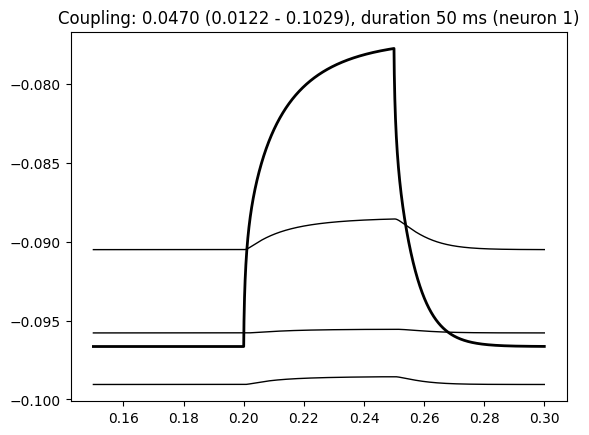

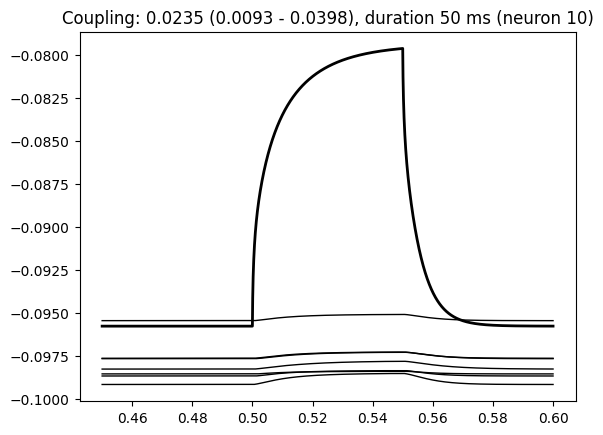

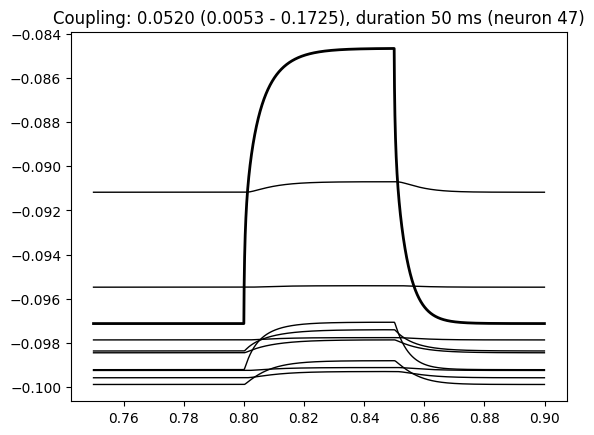

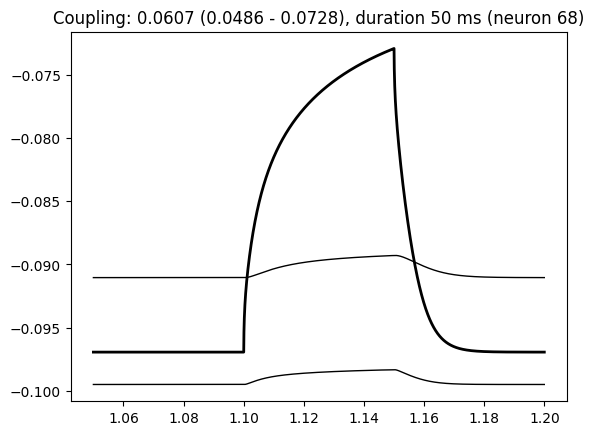

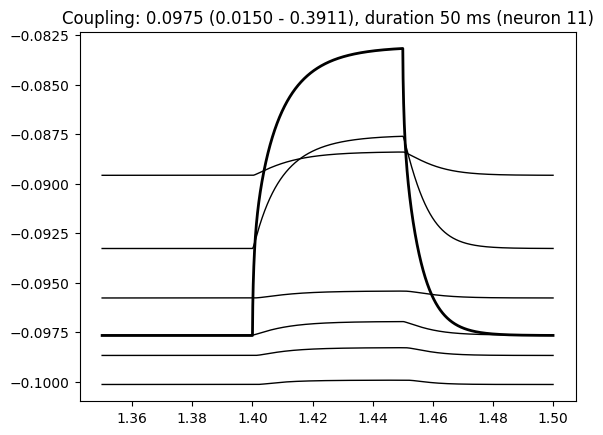

In [12]:
ac.plot_coupling(duration=0.050, amplitude=None)

In [13]:
import os
from snudda.analyse.analyse import SnuddaAnalyse
sa = SnuddaAnalyse(hdf5_file=os.path.join(network_path, "network-synapses.hdf5"))

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Number of neurons: 100
Created connection matrix 6.570899859070778e-05 seconds
GJ row : 0 - 0.0 %  time : 0.0011612550006248057 seconds
Created gap junction connection matrix 0.003195097000570968 seconds
Creating population dictionary
Done.
Taking corner neurons: Keeping 100/100
Calculating synapse distance histogram
Creating dist histogram
Created distance histogram (optimised) in 0.0007943790114950389 seconds
Saving cache to FS_gap_junction_coupling_simulation/network-synapses.hdf5-cache


Plotting connection probability FS to FS (gap_junctions)
Centering in None : Keeping 100/100
Counting connections
Requested: 10000000.0 calculated [9900.]
P(d<0.00025) = 0.03773584905660377
P(d<0.00025) = 0.03773584905660377


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


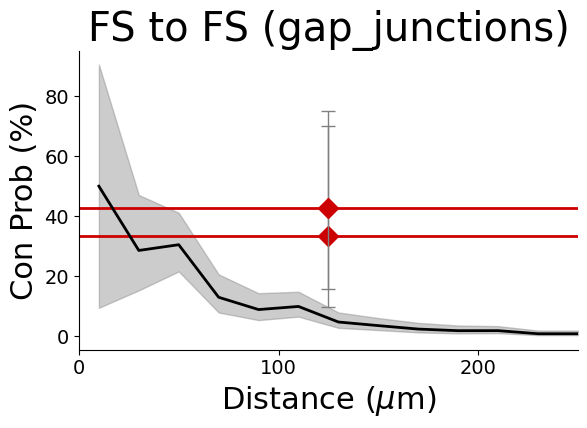

Wrote FS_gap_junction_coupling_simulation/figures/Network-distance-dependent-connection-probability-FS-to-FS-gap_junctions-3D-dist.png


({0.00025: 0.03773584905660377},
 'FS_gap_junction_coupling_simulation/figures/Network-distance-dependent-connection-probability-FS-to-FS-gap_junctions-3D-dist.png')

In [14]:
# Koos & Tepper 1999, 2/6
sa.plot_connection_probability("FS", "FS",
                               dist_3d=True,
                               connection_type="gap_junctions",
                               exp_max_dist=[250e-6, 250e-6],
                               exp_data=[2 / 6.0, 3 / 7.0],
                               exp_data_detailed=[(2, 6), (3, 7)], )

Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 100/100
Calculating max synapses
Calculating mean synapses
Plotting 156 connections


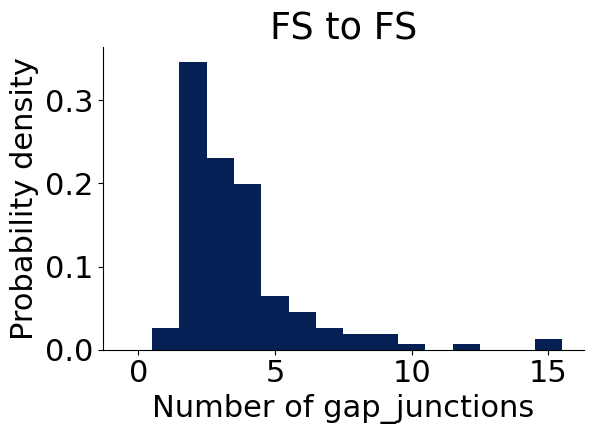

Wrote FS_gap_junction_coupling_simulation/figures/Network-number-of-gap_junctions-from-FS-to-FS-per-cell.png


In [15]:
sa.plot_num_synapses_per_pair("FS", "FS", connection_type="gap_junctions")

Calculating number of incoming connections FS -> FS
Centering in None : Keeping 14/100
#pre = 100, #post = 14


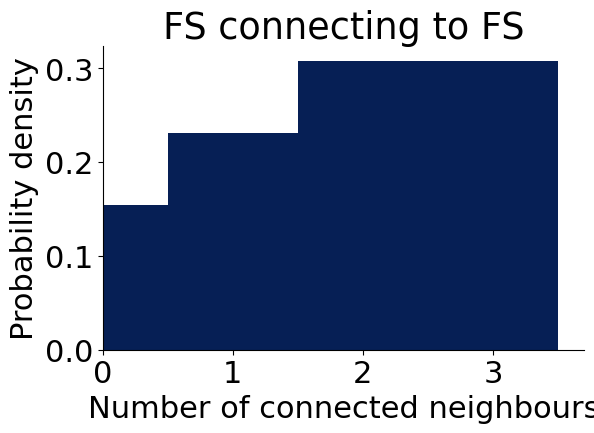

Wrote FS_gap_junction_coupling_simulation/figures/Network-gap_junctions-input-to-FS-from-FS.png


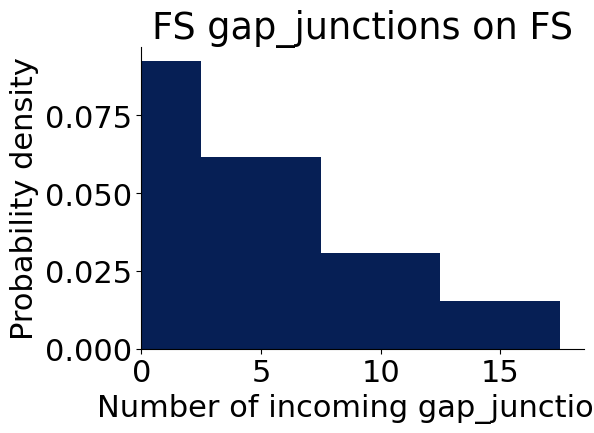

Wrote FS_gap_junction_coupling_simulation/figures/Network-gap_junctions-to-FS-from-FS.png


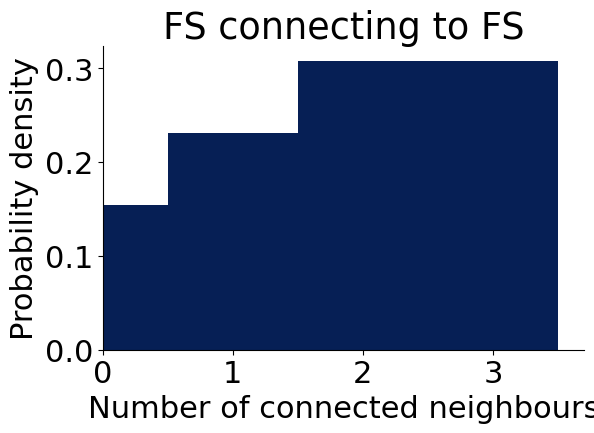

In [16]:
sa.plot_incoming_connections(neuron_type="FS", pre_type="FS", connection_type="gap_junctions")